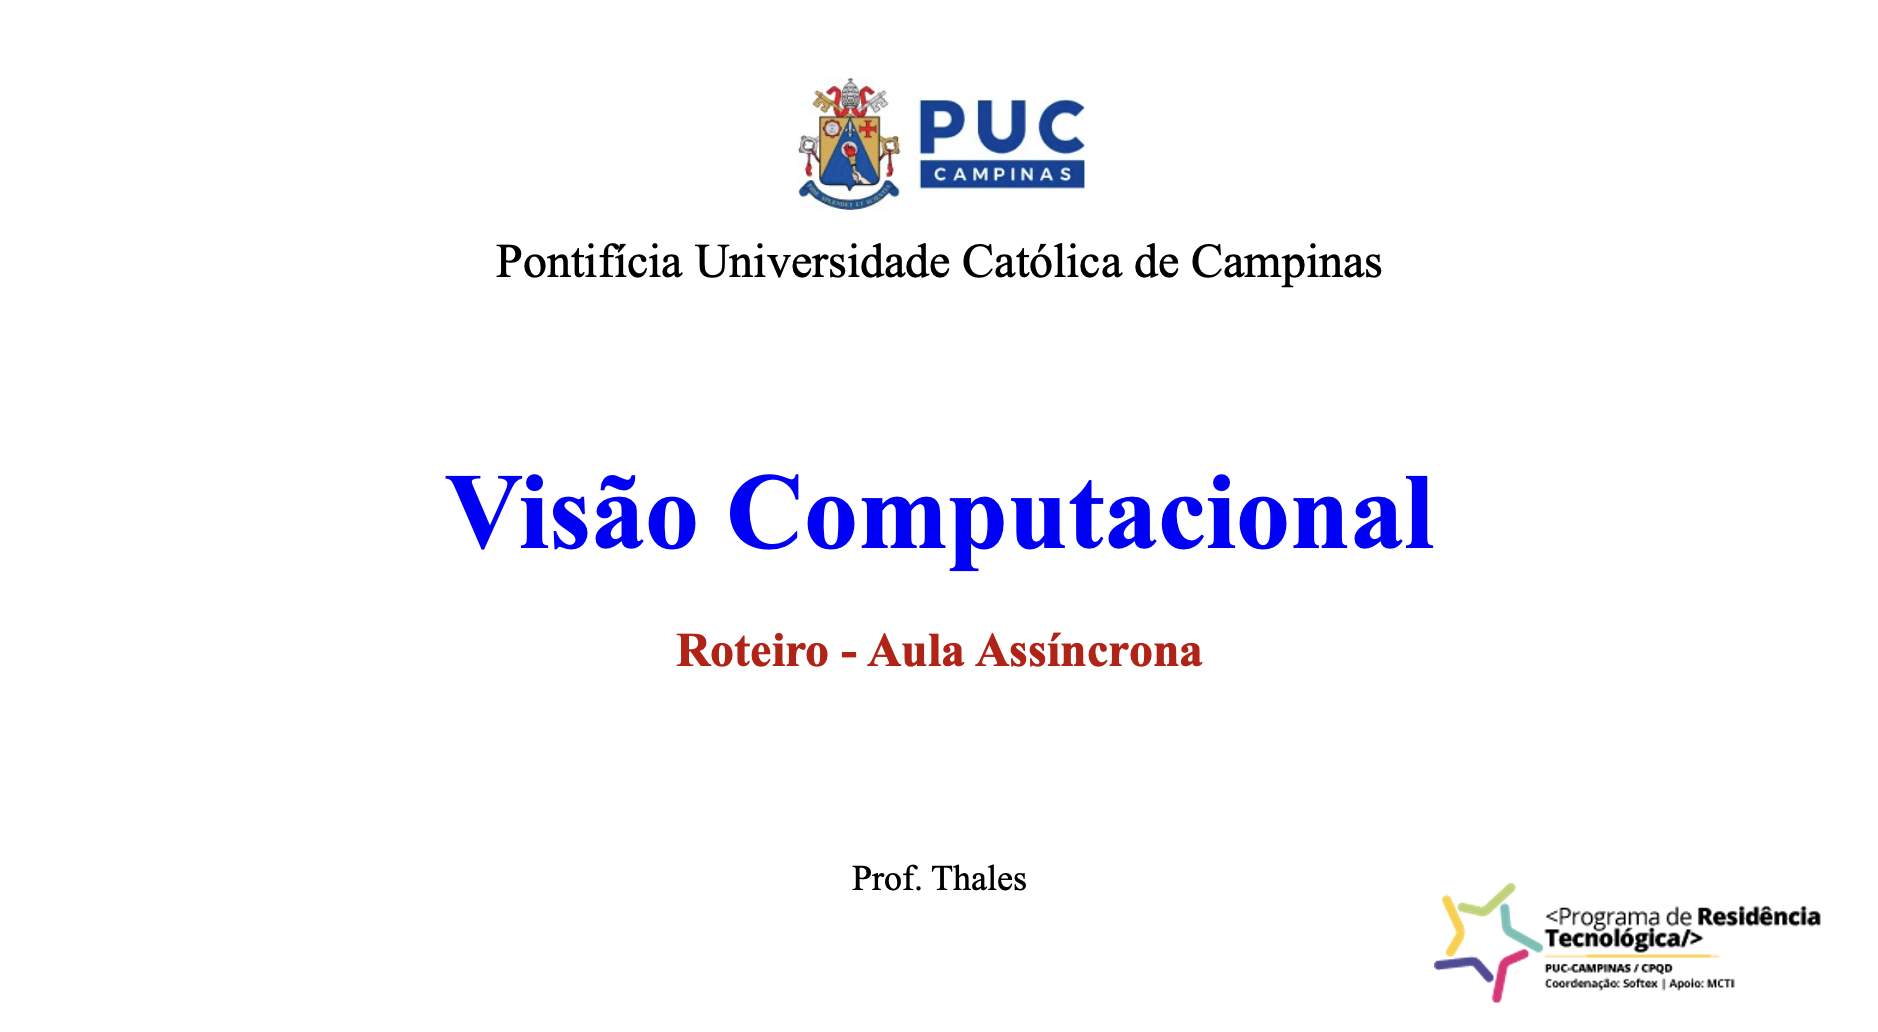



---



---

# **Summário:**

- **Descritores:**
  - Implementar algoritmos para extração de descritores em imagens: descritores de bordas, retas, quinas, pontos, gradiente, textura, cor, contorno, região e forma.

- **Processar dados e informações de redes neurais:**
  - Aplicar arquiteturas de CNN: VGG, GoogLeNet, DenseNet e DNN.

- **Aplicar métodos de transferência de aprendizagem e modelos de deep learning:**

  - Redes Adversárias Generativas (Generative Adversarial Networks - GANs).

---



---



# **Descritores Discussões:**

- Pesquise sobre os diversos tipos de descritores: descritores de bordas, retas, quinas, pontos, gradiente, textura, cor, contorno, região e forma.

- Escreva um pequeno parágrafo, com no máximo 3 linhas, sobre o assunto.

**Os descritores são ferramentas muito utilizadas no processamento de imagens para representar características específicas de objetos ou regiões em uma imagem, tendo a capacidade de capturar informações como bordas nítidas, linhas, cantos, pontos de interesse, mudanças de intensidade, texturas, cores predominantes, contornos, áreas regionais e formas geométricas. Esses descritores são utilizados em uma variedade de aplicações, desde reconhecimento de padrões até análise de imagens médicas, desempenhando um papel fundamental na extração e interpretação de informações visuais. Um aplicação do dia a dia é o seu uso em sistemas de segurança que necessitam identificar impressões digitais**

## **Implemetação Descritor HOG:**

- Rode o código e observe o funcionamento do HOG.

In [ ]:
# Importando as bibliotecas necessárias
import cv2  # OpenCV para processamento de imagens
from skimage import data  # Scikit-Image para obter imagens de exemplo
from skimage.feature import hog  # Scikit-Image para cálculo do descritor HOG
import matplotlib.pyplot as plt  # Matplotlib para exibição das imagens

# Carregando uma imagem de exemplo (no caso, a imagem de um astronauta)
imagem = data.astronaut()

# Convertendo a imagem para tons de cinza (escala de cinza)
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

# Calculando o descritor HOG (Histogram of Oriented Gradients) para a imagem em tons de cinza
# Definindo os parâmetros: 9 orientações, tamanho de célula de 8x8 pixels, tamanho de bloco de 2x2 células
# A opção 'visualize=True' permite que também obtenhamos uma imagem de visualização do descritor HOG
descritor_hog, visualizacao = hog(imagem_cinza, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)


# Criando uma figura com duas subplots (uma para a imagem original e outra para a visualização do descritor HOG)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Exibindo a imagem original na primeira subplot
ax1.imshow(imagem, cmap='gray')
ax1.set_title('Imagem Original')

# Exibindo a visualização do descritor HOG na segunda subplot
ax2.imshow(visualizacao, cmap='gray')
ax2.set_title('Descritor HOG')

# Removendo as coordenadas dos eixos nas subplots
for ax in [ax1, ax2]:
    ax.axis('off')

# Ajustando o layout para garantir que as subplots não se sobreponham
plt.tight_layout()

# Exibindo a figura com as subplots
plt.show()



---

---


# **Processar dados e informações de redes neurais:**

---
## **VGG:**

- Geralmente, esse tipo de arquitetura é empregada via Transfer Learning.

- Rode o código e perceba que também é possível treinar o modelo sem descongelar as camadas provenientes do Transfer Learning. No entanto, recomenda-se o refinamento das camadas provenientes do Transfer Learning à nova tarefa.

In [ ]:
# Importações
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
import numpy as np

# Carregar e pré-processar os dados usando TensorFlow Datasets
def load_and_preprocess_data():
    (train_dataset, test_dataset), info = tfds.load(
        'cats_vs_dogs',
        split=['train[:80%]', 'train[80%:]'],
        as_supervised=True,
        with_info=True
    )

    def preprocess(image, label):
        image = tf.image.resize(image, (224, 224))
        image = tf.keras.applications.vgg16.preprocess_input(image)  # Pré-processamento específico da VGG16
        return image, label

    train_dataset = train_dataset.map(preprocess)
    test_dataset = test_dataset.map(preprocess)

    return train_dataset, test_dataset

# Carregar e pré-processar os dados
train_dataset, test_dataset = load_and_preprocess_data()

# ------------------------------------------------------------------------------
# Código padrão até aqui
# ------------------------------------------------------------------------------

# Criar base da VGG16 (sem incluir as camadas de topo)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar camadas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combinar modelo base com camadas personalizadas
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar o modelo
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treinar o modelo
model.fit(train_dataset.batch(32), epochs=2)

---
## **DenseNet:**

- Rode o código e observe que, em implementações mais modernas, a DenseNet também é implementada via Transfer Learning.

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
from math import exp

# Carregar e pré-processar os dados usando TensorFlow Datasets
def load_and_preprocess_data():
    (train_dataset, test_dataset), info = tfds.load(
        'cats_vs_dogs',
        split=['train[:80%]', 'train[80%:]'],
        as_supervised=True,
        with_info=True
    )

    def preprocess(image, label):
        image = tf.image.resize(image, (224, 224))
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    train_dataset = train_dataset.map(preprocess)
    test_dataset = test_dataset.map(preprocess)

    return train_dataset, test_dataset

# Carregar e pré-processar os dados
train_dataset, test_dataset = load_and_preprocess_data()

# ------------------------------------------------------------------------------
# Código padrão até aqui
# ------------------------------------------------------------------------------

# Criar base da DenseNet121 (sem incluir as camadas de topo)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar camadas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combinar modelo base com camadas personalizadas
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar o modelo
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treinar o modelo
model.fit(train_dataset.batch(32), epochs=5)

In [ ]:
# Avalie o modelo
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc}")

---

## **GoogLeNet:**

- Rode o código e observe que, novamente, em implementações mais modernas, a GoogLeNet também é implementada via Transfer Learning. Tal rede é extremamente custosa computacionalmente do ponto de vista de treinamento. Dessa forma, a viabilidade de implementação é alcançada via Transfer Learning.

- Tal rede possui um bloco conhecido por Inception, é uma  espécie de bloco capaz de empregar concatenações paralelas.

### **Bloco Inception:**

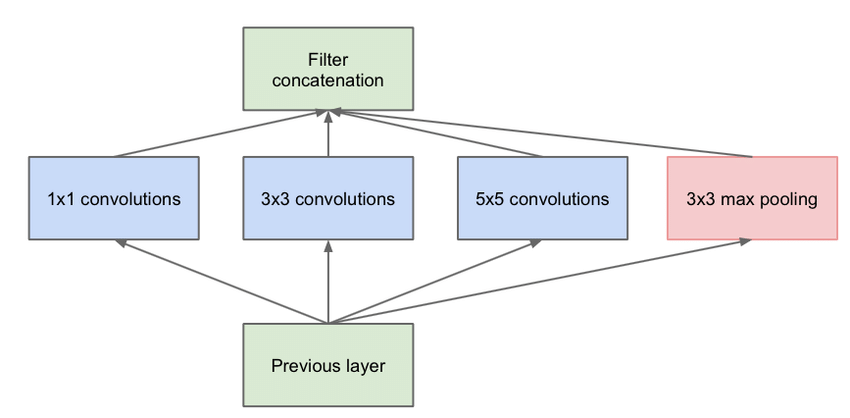

In [ ]:
# Importações
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import InceptionV3  # Importar a InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

# Carregar e pré-processar os dados usando TensorFlow Datasets
def load_and_preprocess_data():
    (train_dataset, test_dataset), info = tfds.load(
        'cats_vs_dogs',
        split=['train[:80%]', 'train[80%:]'],
        as_supervised=True,
        with_info=True
    )

    def preprocess(image, label):
        image = tf.image.resize(image, (224, 224))
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    train_dataset = train_dataset.map(preprocess)
    test_dataset = test_dataset.map(preprocess)

    return train_dataset, test_dataset

# Carregar e pré-processar os dados
train_dataset, test_dataset = load_and_preprocess_data()

# ------------------------------------------------------------------------------
# Código padrão até aqui
# ------------------------------------------------------------------------------

# Criar base da InceptionV3 (sem incluir as camadas de topo)
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Adicionar camadas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Combinar modelo base com camadas personalizadas
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar as camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar o modelo
opt = SGD(learning_rate=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treinar o modelo
model.fit(train_dataset.batch(32), epochs=5)

In [ ]:
# Avalie o modelo
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc}")



---


## **GoogLeNet:**

- Não é necessário rodar o código abaixo;

- No entanto, note o tamanho e a complexidade da GoogLeNet via model.summary().

In [ ]:
# Importações
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

# Carregar e pré-processar os dados usando TensorFlow Datasets
def load_and_preprocess_data():
    (train_dataset, test_dataset), info = tfds.load(
        'cats_vs_dogs',
        split=['train[:80%]', 'train[80%:]'],
        as_supervised=True,
        with_info=True
    )

    def preprocess(image, label):
        image = tf.image.resize(image, (224, 224))
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    train_dataset = train_dataset.map(preprocess)
    test_dataset = test_dataset.map(preprocess)

    return train_dataset, test_dataset

# Carregar e pré-processar os dados
train_dataset, test_dataset = load_and_preprocess_data()

# Definir o bloco Inception
def InceptionModule(x, filters):
    conv1x1 = Conv2D(filters[0], (1, 1), activation='relu')(x)

    conv3x3_reduce = Conv2D(filters[1], (1, 1), activation='relu')(x)
    conv3x3 = Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3_reduce)

    conv5x5_reduce = Conv2D(filters[3], (1, 1), activation='relu')(x)
    conv5x5 = Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5_reduce)

    pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_conv = Conv2D(filters[5], (1, 1), activation='relu')(pool)

    output = concatenate([conv1x1, conv3x3, conv5x5, pool_conv], axis=-1)
    return output

# Definir a arquitetura GoogLeNet
def GoogLeNet(input_shape=(224, 224, 3)):
    inp = Input(input_shape)
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inp)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = InceptionModule(x, [64, 96, 128, 16, 32, 32])
    # 64 filtros para a operação 1x1 convolução.
    # 96 filtros para a operação de convolução 1x1 antes da convolução 3x3.
    # 128 filtros para a operação de convolução 1x1 antes da convolução 5x5.
    # 16 filtros para a operação de convolução 1x1 antes da convolução 1x1 antes do pooling.
    # 32 filtros para a operação de convolução 5x5 dentro do bloco Inception.
    # 32 filtros para a operação de convolução 1x1 antes do pooling.

    x = InceptionModule(x, [128, 128, 192, 32, 96, 64])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = InceptionModule(x, [192, 96, 208, 16, 48, 64])
    x = InceptionModule(x, [160, 112, 224, 24, 64, 64])
    x = InceptionModule(x, [128, 128, 256, 24, 64, 64])
    x = InceptionModule(x, [112, 144, 288, 32, 64, 64])
    x = InceptionModule(x, [256, 160, 320, 32, 128, 128])
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = InceptionModule(x, [256, 160, 320, 32, 128, 128])
    x = InceptionModule(x, [384, 192, 384, 48, 128, 128])

    x = AveragePooling2D((7, 7))(x)
    x = Flatten()(x)
    x = Dropout(0.4)(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=x)
    return model

# Crie o modelo GoogLeNet
model = GoogLeNet()

# Compile o modelo learning_rate
opt = SGD(lr=0.01)
model.compile(optimizer=opt, loss=BinaryCrossentropy(), metrics=['accuracy'])

# Treine o modelo
model.fit(train_dataset.batch(32), epochs=3)

In [ ]:
# Avalie o modelo
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"Test accuracy: {test_acc}")

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              



---


# **Dense Neural Network (DNN):**

- Dense Neural Network (DNN) refere-se ao fato de que cada neurônio em uma camada está conectado a todos os neurônios na camada seguinte, o que significa que não há conexões ausentes ou esparsas entre as camadas. Cada neurônio em uma camada oculta recebe uma combinação dos valores de saída dos neurônios da camada anterior, aplica uma função de ativação a essa combinação e passa o resultado para a próxima camada;

- Uma DNN, também conhecida como Feedforward Neural Network ou Multilayer Perceptron, é um tipo de rede neural artificial que consiste em várias camadas de neurônios artificiais, também chamados de unidades ou perceptrons, organizados em uma estrutura de camadas sucessivas. Essas camadas incluem uma camada de entrada, camadas ocultas (hidden layers) e uma camada de saída.

- Perceba que a rede que vimos em aula síncrona, no tópico sobre Transfer Learning (TL), trata-se de uma DNN. Não é necessário rodar o código deste tópico, apenas observe a implementação da arquitetura DNN empregada.

In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Carrega o conjunto de dados MNIST, que consiste em dígitos escritos à mão
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normaliza os valores dos pixels para o intervalo [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Redimensiona as imagens para um vetor unidimensional
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# Divide o conjunto de treinamento em subconjuntos de treinamento e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Cria um modelo sequencial de rede neural
mlp_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compila o modelo definindo o otimizador, a função de perda e as métricas de avaliação
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



---


# **Generative Adversarial Network (GAN)**

- Observe a execução da GAN abaixo;
- Rode novamente e registre seu resultado com os plots definidos previamente.

## I) Execução da arquitetura para a base de dados MNIST:

In [ ]:
from __future__ import print_function, division

# Importação de bibliotecas
%tensorflow_version 2.x  # Comando específico do Jupyter Notebook para selecionar a versão do TensorFlow
from keras.datasets import mnist  # Importar o conjunto de dados MNIST
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt  # Biblioteca para exibição de imagens
import sys
import numpy as np

# Classe GAN (Generative Adversarial Network)
class GAN():
    def __init__(self):
        # Configurações das imagens
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100  # Dimensão do espaço latente (vetores aleatórios)

        optimizer = 'Adam'

        # Construir o discriminador (rede neural que distingue entre imagens reais e geradas)
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])  # Usar otimizador Adam e métrica de acurácia

        # Construir o gerador (rede neural que gera imagens)
        self.generator = self.build_generator()

        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        self.discriminator.trainable = False  # Congelar os pesos do discriminador

        validity = self.discriminator(img)

        # Criar o modelo combinado (GAN)
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)  # Usar otimizador Adam

    def build_generator(self):
        # Construir o gerador (rede neural que gera imagens)
        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))  # Função de ativação LeakyReLU
        model.add(BatchNormalization(momentum=0.8))  # Normalização em lote
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))  # Camada de saída com ativação tanh
        model.add(Reshape(self.img_shape))  # Reformular a saída para a forma da imagem

        model.summary()  # Resumo da arquitetura do modelo

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):
        # Construir o discriminador (rede neural que distingue entre imagens reais e geradas)
        model = Sequential()
        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))  # Função de ativação LeakyReLU
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))  # Camada de saída com ativação sigmóide

        model.summary()  # Resumo da arquitetura do modelo

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):
        # Carregar e pré-processar o conjunto de dados MNIST
        (X_train, _), (_, _) = mnist.load_data()
        X_train = X_train / 127.5 - 1.  # Normalizar os valores de pixel para o intervalo [-1, 1]
        X_train = np.expand_dims(X_train, axis=3)  # Adicionar uma dimensão para representar os canais

        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Treinar o Discriminador
            # ---------------------

            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            gen_imgs = self.generator.predict(noise)

            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Treinar o Gerador
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            g_loss = self.combined.train_on_batch(noise, valid)

            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            if epoch % sample_interval == 0:
                self.sample_images(epoch)  # Gerar imagens de exemplo

    def sample_images(self, epoch):
        r, c = 5, 5  # Número de linhas e colunas de imagens a serem geradas
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))  # Gerar ruído aleatório
        gen_imgs = self.generator.predict(noise)  # Gerar imagens a partir do ruído

        gen_imgs = 0.5 * gen_imgs + 0.5  # Reescalar os valores de pixel para o intervalo [0, 1]

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')  # Exibir imagens geradas em tons de cinza
                axs[i,j].axis('off')  # Desativar rótulos dos eixos
                cnt += 1
        fig.savefig(f"%d.png" % epoch)  # Salvar as imagens geradas
        plt.close()

if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=30001, batch_size=32, sample_interval=1000)  # Treinar a GAN


A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 [==============================] - 0s 23ms/step
27503 [D loss: 0.635732, acc.: 70.31%] [G loss: 1.527708]
1/1 [==============================] - 0s 23ms/step
27504 [D loss: 0.550412, acc.: 67.19%] [G loss: 1.518174]
1/1 [==============================] - 0s 22ms/step
27505 [D loss: 0.373019, acc.: 84.38%] [G loss: 1.882560]
1/1 [==============================] - 0s 23ms/step
27506 [D loss: 0.437267, acc.: 82.81%] [G loss: 1.933902]
1/1 [==============================] - 0s 17ms/step
27507 [D loss: 0.431438, acc.: 81.25%] [G loss: 2.611923]
1/1 [==============================] - 0s 27ms/step
27508 [D loss: 0.422843, acc.: 76.56%] [G loss: 2.382495]
1/1 [==============================] - 0s 16ms/step
27509 [D loss: 0.422927, acc.: 82.81%] [G loss: 1.994734]
1/1 [==============================] - 0s 25ms/step
27510 [D loss: 0.419265, acc.: 78.12%] [G loss: 1.601011]
1/1 [==============================] - 0s 21ms/step
27511 [D 

## II) Imagens obtidas para a base de dados MNIST:

### **Primeira imagem obtida para a base de dados MNIST:**

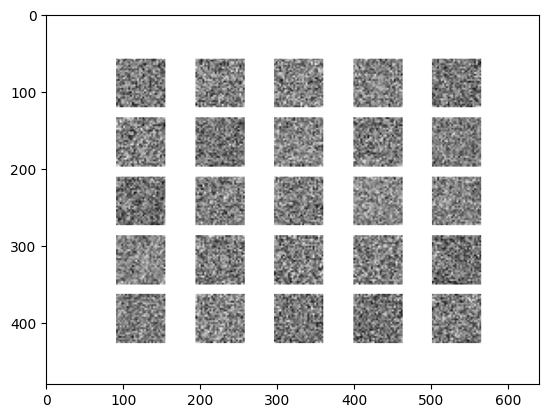

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("0.png")
plt.imshow(image)
plt.show()

### **Imagem obtida após 1000 épocas de treinamento para a base de dados MNIST:**

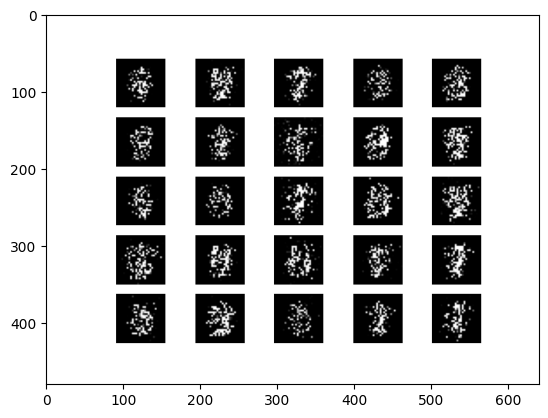

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("1000.png")
plt.imshow(image)
plt.show()

### **Imagem obtida após 10000 épocas de treinamento para a base de dados MNIST:**

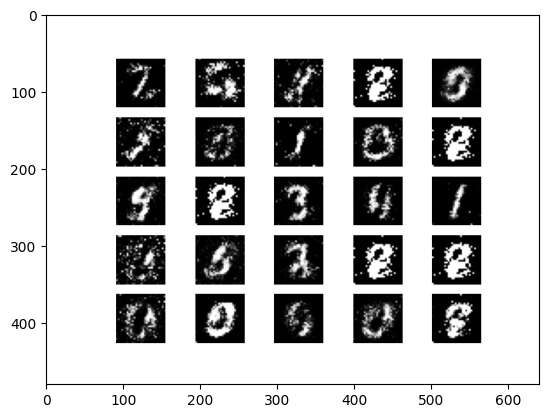

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("10000.png")
plt.imshow(image)
plt.show()

### **Imagem obtida após 20000 épocas de treinamento para a base de dados MNIST:**

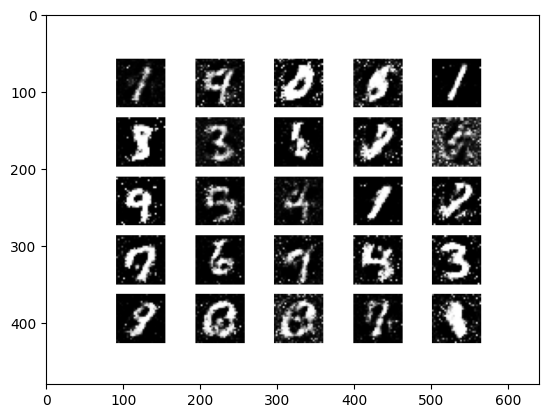

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("20000.png")
plt.imshow(image)
plt.show()

### **Imagem obtida após 30000 épocas de treinamento para a base de dados MNIST:**

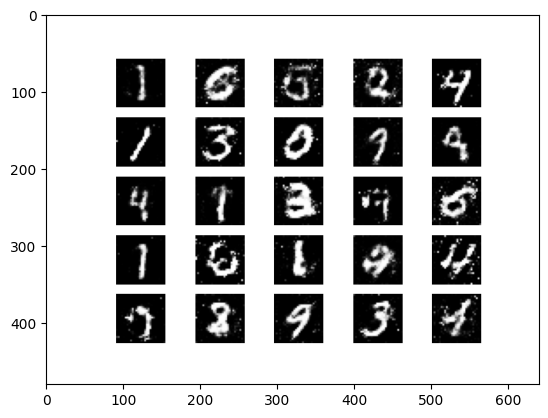

In [ ]:
import matplotlib.image as mpimg

image = mpimg.imread("30000.png")
plt.imshow(image)
plt.show()